Name : Chathumini B.G.D.T.

Index Number : 190107T

Assignment 2

Question 1

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import random

# np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0 , 2*np.pi , half_n )
n = s*np.random.randn( half_n )
x_c , y_c = ( r + n)*np.cos( t ) , ( r + n)*np.sin( t )
X_circ = np.hstack(( x_c.reshape( half_n , 1 ), y_c.reshape( half_n , 1 ))) # X_circ.shape= (50,2)

m, b = -1, 2
x_l = np.linspace(-12, 12 , half_n )
y_l = m*x_l + b + s*np.random.randn( half_n )
X_line = np.hstack((x_l.reshape( half_n , 1 ) ,y_l.reshape( half_n , 1 )))  # x_line.shape = (50,2)
X = np.vstack((X_circ , X_line ))  # X.shape = (100,2)

In [2]:
class RANSAC:
    # RANSAC algorithm

    def __init__(self,x_values,y_values,thresh_dis,n_samples):
        # initialization of the variables used
        self.x_values=x_values
        self.y_values=y_values
        self.s = 3 #minimum no. of points needed
        self.t = thresh_dis # threshold distance
        self.N=n_samples
        self.outliers = []
        self.inliers = []
        self.points = []
        self.best_model = None

    def dis_point_point(self, p1,p2): # calculate distance from 2 points
        return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

    def random_points(self): # select 3 random points
        self.points=[]
        i =1
        while i < 4:
            r_num =random.randint(0,len(self.x_values)-1)
            point = (self.x_values[r_num],self.y_values[r_num])
            if point not in self.points:
                self.points.append(point)
                i+=1

    def circle(self): # calculate the center point and radius of the circle
        p_1,p_2,p_3 = self.points
        Y = np.array([[p_2[0] - p_1[0], p_2[1] - p_1[1]], [p_3[0] - p_2[0], p_3[1] - p_2[1]]])
        Z = np.array([[p_2[0]**2 - p_1[0]**2 + p_2[1]**2 - p_1[1]**2], [p_3[0]**2 - p_2[0]**2 + p_3[1]**2 - p_2[1]**2]])
        inverse_Y = linalg.inv(Y)
        c_x, c_y = np.dot(inverse_Y, Z) / 2
        cx, cy = c_x[0], c_y[0]
        r = np.sqrt((cx - p_1[0])**2 + (cy - p_1[1])**2)
        return cx, cy, r
    
    def in_out_liers(self): # calculate inliers and outlier
        inliers_new =[]
        outliers_new = []
        cen_x, cen_y, r = self.circle()
        for i in range (len(self.x_values)):
            distance = self.dis_point_point((self.x_values[i],self.y_values[i]),(cen_x,cen_y))
            if abs(distance - r)<= self.t:
                inliers_new.append((self.x_values[i],self.y_values[i]))
            else:
                outliers_new.append((self.x_values[i],self.y_values[i]))

        if len(self.inliers)<len(inliers_new): # finding best model
            self.inliers=inliers_new
            self.outliers=outliers_new
            self.best_model=(cen_x, cen_y, r)
    
    def find_best_model(self): # find best model by repeating N times
        for j in range(self.N):
            self.random_points()
            self.in_out_liers()
        return self.best_model

In [3]:
# finding the best sample
best_samp=RANSAC(X[:,0],X[:,1],1,35)
print("Best sample",best_samp.find_best_model())

# RANSAC estimation using best sample
ransac=RANSAC(np.array(best_samp.inliers)[:,0],np.array(best_samp.inliers)[:,1],1,35)
print("ransac sample",ransac.find_best_model())

Best sample (-0.4533024854100183, 0.03054860450478808, 10.047289810665516)
ransac sample (-0.2583120820524244, -0.21264722688763074, 10.017042754110513)


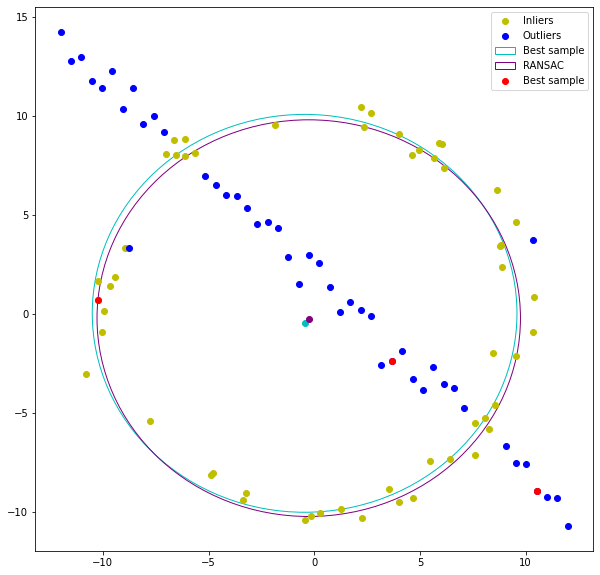

In [4]:

fig,ax=plt.subplots(figsize=(10,10))
ax.plot(np.array(best_samp.inliers)[:,0],np.array(best_samp.inliers)[:,1],'o',color='y', label='Inliers')
ax.plot(np.array(best_samp.outliers)[:,0],np.array(best_samp.outliers)[:,1],'o',color='b', label='Outliers')

best_model_circle = plt.Circle((best_samp.best_model[0], best_samp.best_model[1]), best_samp.best_model[2], color='c',fill=False,label='Best sample')
ax.add_patch(best_model_circle)
ransac_circle = plt.Circle((ransac.best_model[0], ransac.best_model[1]), ransac.best_model[2], color='purple',fill=False,label='RANSAC')
ax.add_patch(ransac_circle)

ax.plot(np.array(best_samp.points)[:,0],np.array(best_samp.points)[:,1],'o',color='r', label='Best sample')
ax.scatter(best_samp.best_model[0],best_samp.best_model[0],c='c')
ax.scatter(ransac.best_model[0],ransac.best_model[0],c='purple')
ax.legend()
plt.show()

Question 2

In [61]:
import cv2 as cv

mouse_points=[]
def get_mouse_points(image):
    # get co-ordinates of the mouse clicks
    global mouse_points
    img=cv.imread(image)
    count=0
    def click_event(event, x, y, flags, params):
        if event==cv.EVENT_LBUTTONDOWN:
            mouse_points.append([x,y]) 
            cv.circle(img, (x,y), 2, [0,0,255], 2) # drawing a small dot in the clicked position
            cv.imshow('image', img)
    cv.namedWindow('image',cv.WINDOW_AUTOSIZE)    
    cv.imshow('image', img)
    cv.setMouseCallback('image', click_event)
    while count<4:
        cv.waitKey(1) 
        count+=1 
    cv.waitKey(0)
    cv.destroyAllWindows()
    return mouse_points

def homography(img_fg,img_bg):#homography and combine two images
    fh,fg=img_fg.shape[0],img_fg.shape[1]
    pts_src = np.array([[0, 0], [0, fg], [fh, 0],[fh, fg]])
    pts_dst = np.array(get_mouse_points('001.jpg'))
    h, status = cv.findHomography(pts_src, pts_dst)
    im_out = cv.warpPerspective(img_fg, h, (img_bg.shape[1],img_bg.shape[0]))
    return im_out

def plot_align(img_fg,img_bg):
    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.imshow(cv.cvtColor(cv.addWeighted(img_bg,1,homography(img_fg,img_bg),0.5,0), cv.COLOR_BGR2RGB))
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()
    

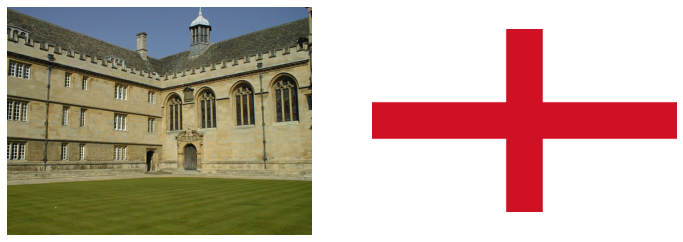

In [29]:
hall=cv.imread(r'001.jpg')
assert hall is not None
flag =cv.imread(r'Flag_of_England.png')
assert flag is not None

fig,axis=plt.subplots(1,2,figsize=(12,12))
axis[0].imshow(cv.cvtColor(hall, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[1].imshow(cv.cvtColor(flag, cv.COLOR_BGR2RGB))
axis[1].axis('off')
plt.show()

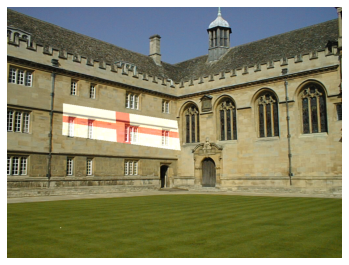

In [31]:
plot_align(flag,hall)

Question 3 (a)

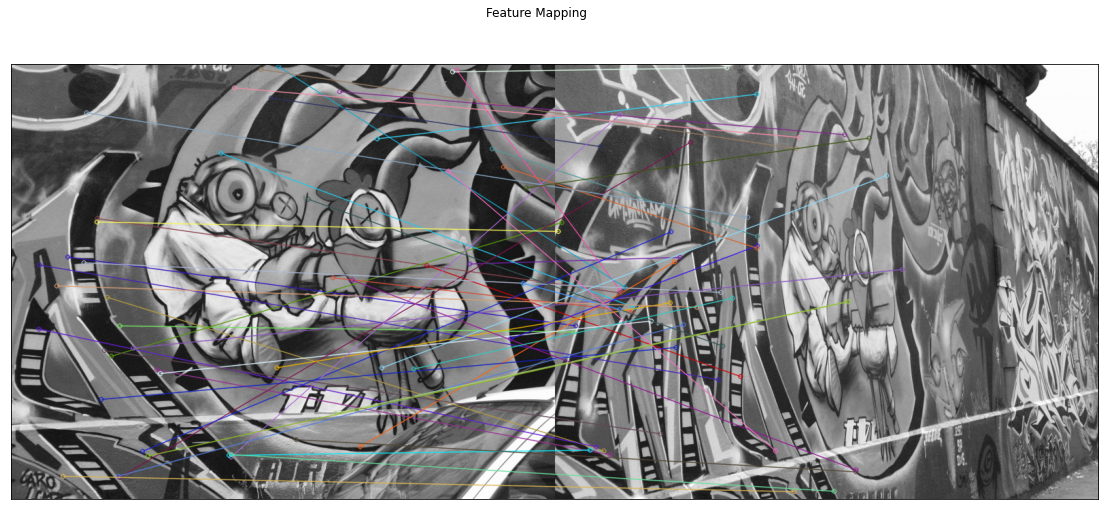

In [27]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

im_1 = cv.imread(r'./graf/img1.ppm')  
im_2 = cv.imread(r'./graf/img5.ppm') 

graf_1 = cv.cvtColor(im_1, cv.COLOR_BGR2GRAY)
graf_2 = cv.cvtColor(im_2, cv.COLOR_BGR2GRAY)

#sift
sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(graf_1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(graf_2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

plt.figure(figsize=(20,8))
image= cv.drawMatches(graf_1, keypoints_1, graf_2, keypoints_2, matches[:50], graf_2, flags=2)
plt.imshow(image)
plt.xticks([]),plt.yticks([])
plt.suptitle('Feature Mapping')
plt.show()

Question 3 (b), (c)

In [45]:
def homography(X, Y):
    O = np.array([[0],[0],[0]])
    A = []

    for i in range(4):
        A.append(np.concatenate((O.T, np.expand_dims(X.T[i,:], axis=0), np.expand_dims(-1*Y[1, i]*X.T[i,:], axis=0) ), axis=1))
        A.append(np.concatenate((np.expand_dims(X.T[i,:], axis=0), O.T, np.expand_dims(-1*Y[0, i]*X.T[i,:], axis=0) ), axis=1))
    A = np.array(A).squeeze().astype(np.float64)
    eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
    Homo = eigen_vectors[:, np.argmin(eigen_values)]
    Homo  = Homo.reshape(3, -1)
    return Homo 

def n_inliers(X_full, Y_full, H, t, X_inliers, Y_inliers):
    count = 0
    t_X_full = H @ X_full
    t_X_full = t_X_full / t_X_full[2,:]

    error = np.sqrt(np.sum(np.square(t_X_full - Y_full), axis=0))
    inlier_indices = np.where(error <= t)[0]

    X_inliers = np.concatenate((X_inliers, X_full[:,inlier_indices]), axis=1)
    Y_inliers = np.concatenate((Y_inliers, Y_full[:,inlier_indices]), axis=1)
    count = inlier_indices.shape[0]
    return count, X_inliers, Y_inliers

def sift(img1_path, img2_path):
    img1 = cv.imread(img1_path)
    img5 = cv.imread(img2_path)

    img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

    sift = cv.SIFT_create(nOctaveLayers = 3,contrastThreshold = .1,edgeThreshold = 25,sigma =1)

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1_gray, None) 
    keypoints_2, descriptors_2 = sift.detectAndCompute(img5_gray, None)  

    keypoints_img_1 = np.zeros(img1_gray.shape)
    keypoints_img_5 = np.zeros(img5_gray.shape)

    keypoints_img_1 = cv.drawKeypoints(img1_gray, keypoints_1, keypoints_img_1)
    keypoints_img_5 = cv.drawKeypoints(img5_gray, keypoints_2, keypoints_img_5)

    bf = cv.BFMatcher()
    matches = bf.knnMatch(descriptors_1,descriptors_2,k=2)

    # ratio test
    good_matches = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good_matches.append([m])

    matches_img = np.zeros(img1_gray.shape)
    matches_img_fifty = np.zeros(img1_gray.shape)

    matches_img = cv.drawMatchesKnn(img1_gray, keypoints_1, img5_gray, keypoints_2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    good_matches = np.squeeze(np.array(good_matches))

    return good_matches, keypoints_1, keypoints_2
    

def RANSAC(img1_path, img2_path, t, d, N):
    # Parameters
    s = 4
    best_fit_homography = None
    best_inlier_count = 0
    best_fit_X_inliers = None
    best_fit_Y_inliers = None
    count_db = []

    matches, kp1, kp2 = sift(img1_path, img2_path)

    X_full = np.zeros((len(matches), 3))
    Y_full = np.zeros((len(matches), 3))

    for i, match in enumerate(matches):
        p1 = kp1[match.queryIdx].pt
        p2 = kp2[match.trainIdx].pt

        X_full[i,:] = np.array([p1[0], p1[1], 1])
        Y_full[i,:] = np.array([p2[0], p2[1], 1])
    
    X_full = X_full.T
    Y_full = Y_full.T

    for _ in range(N):
        x = []

        for i in range(s):
            hold_idx = np.random.randint(0, len(matches))
            
            if len(x) == 0:
                x.append(hold_idx)
            elif hold_idx == x[-1]:                
                while hold_idx == x[-1]:
                    hold_idx = np.random.randint(0, len(matches))
                
                x.append(hold_idx)
            else:
                x.append(hold_idx)
        
        X = np.zeros((4,3))
        Y = np.zeros((4,3))

        for i, idx in enumerate(x):
            match = matches[idx]

            p1 = kp1[match.queryIdx].pt
            p2 = kp2[match.trainIdx].pt

            X[i,:] = np.array([p1[0], p1[1], 1])
            Y[i,:] = np.array([p2[0], p2[1], 1])

        X = X.T
        Y = Y.T

        X_inliers = np.zeros((3, 1))
        Y_inliers = np.zeros((3, 1))
    
        Homo = homography(X, Y)        

        count, X_inliers, Y_inliers = n_inliers(X_full, Y_full, Homo, t, X_inliers, Y_inliers)

        X_inliers = np.delete(X_inliers, 0, axis=1)
        Y_inliers = np.delete(Y_inliers, 0, axis=1)

        count_db.append(count)

        if count > best_inlier_count:
            best_fit_homography = Homo
            best_inlier_count = count
            best_fit_X_inliers = X_inliers
            best_fit_Y_inliers = Y_inliers
    
    return best_fit_homography, best_inlier_count, count_db, best_fit_X_inliers, best_fit_Y_inliers

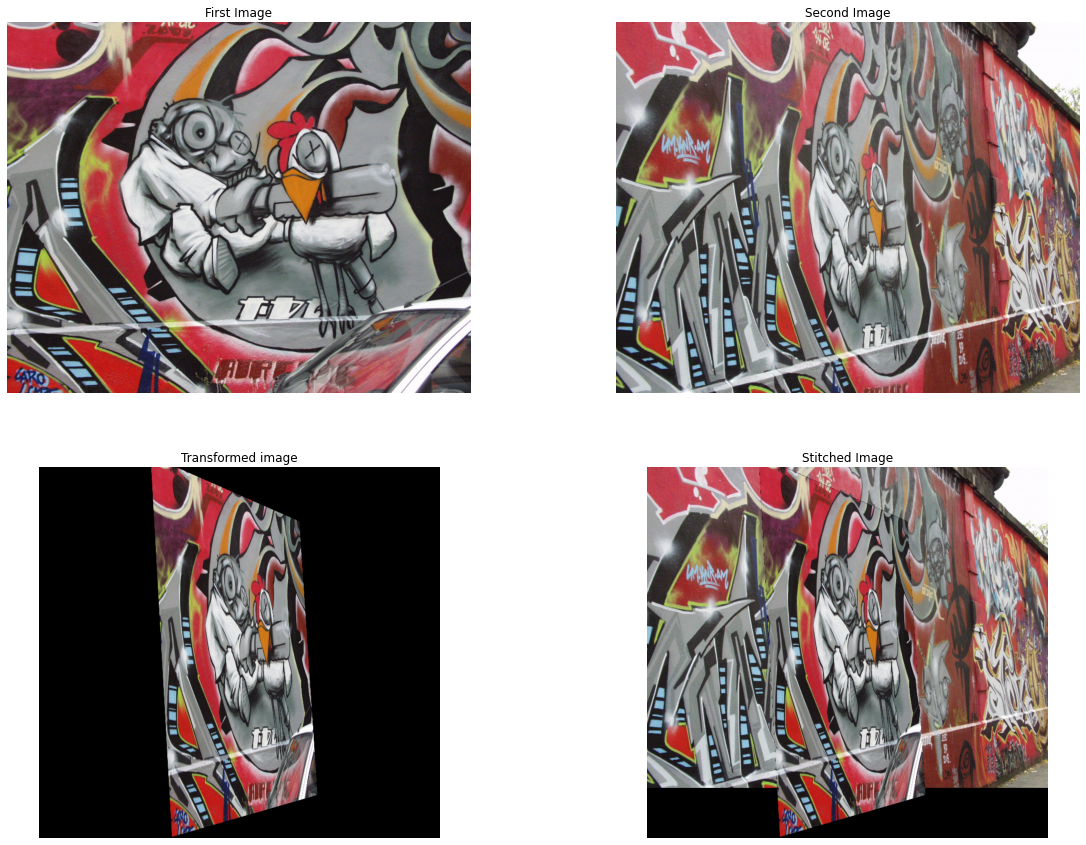

In [56]:
given_homography = []
with open(r'graf/H1to5p') as f:
    given_homography = np.array([[float(h) for h in line.split()] for line in f])

H14, count14, count_db14, best_fit_X_inliers14, best_fit_Y_inliers14 = RANSAC(r'./graf/img1.ppm', r'./graf/img4.ppm', 1, 20, 10000)
H45, count45, count_db45, best_fit_X_inliers45, best_fit_Y_inliers45 = RANSAC(r'./graf/img4.ppm', r'./graf/img5.ppm', 1, 20, 10000)
computed_homography = H45 @ H14
computed_homography=computed_homography/computed_homography[2,2]  # making last element of the homography to 1

final_img = cv.warpPerspective(im_1, computed_homography, dsize=(im_1.shape[1], im_1.shape[0]+100))
transformed_im_1 = np.copy(final_img)

for i in range(final_img.shape[0]):
    for j in range(final_img.shape[1]):
        if np.all(final_img[i,j] == 0) and i < im_2.shape[0] and j < im_2.shape[1]:
            final_img[i,j] = im_2[i,j]

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax[0][0].imshow(cv.cvtColor(im_1, cv.COLOR_BGR2RGB))
ax[0][0].axis("off")
ax[0][0].set_title("First Image")

ax[0][1].imshow(cv.cvtColor(im_2, cv.COLOR_BGR2RGB))
ax[0][1].axis("off")
ax[0][1].set_title("Second Image")

ax[1][0].imshow(cv.cvtColor(transformed_im_1, cv.COLOR_BGR2RGB))
ax[1][0].axis("off")
ax[1][0].set_title("Transformed image")

ax[1][1].imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))
ax[1][1].axis("off")
ax[1][1].set_title("Stitched Image")
plt.show()

In [57]:
print("Actual Homography:\n",given_homography)
print("Calculated Homography:\n",computed_homography)

SSD_Calc= (np.sum((given_homography-computed_homography)**2))**0.5
print("SSD Value =",SSD_Calc)

Actual Homography:
 [[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]
Calculated Homography:
 [[ 6.22685625e-01  5.54507133e-02  2.22329787e+02]
 [ 2.15499411e-01  1.15588616e+00 -2.19799673e+01]
 [ 4.85364432e-04 -4.23870163e-05  1.00000000e+00]]
SSD Value = 3.639549470953883
